In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib tk
import pickle

In [2]:
import torch
import torch.nn as nn

## 1D function

In [3]:
def invex_func_1d(xx):
    x_ = xx*7+0.5
    y_ = 0.2*torch.exp(-2*(x_+0.2)**2) + 0.8*torch.cos(x_) - 0.1*x_**2 + 0.1*x_
    y = -y_/3.1 - 0.61
    return y

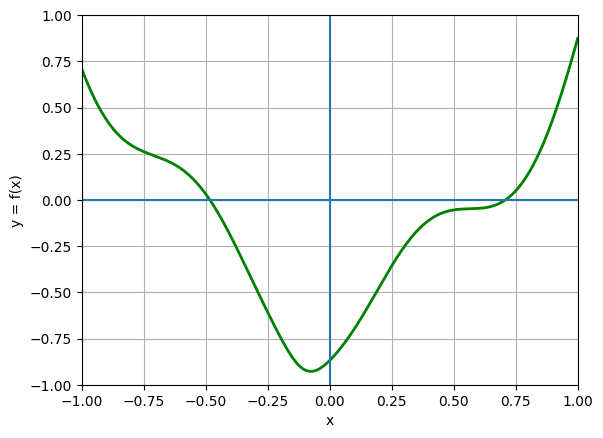

In [4]:
x = torch.tensor(np.linspace(-1, 1, 300))
with torch.no_grad():
    y = invex_func_1d(x)

%matplotlib inline
# plt.scatter(x, y, marker='.', color='g')
plt.plot(x, y, color='g', lw=2)
plt.hlines(0, -1, 1)
plt.vlines(0, -1, 1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.grid()
plt.show()

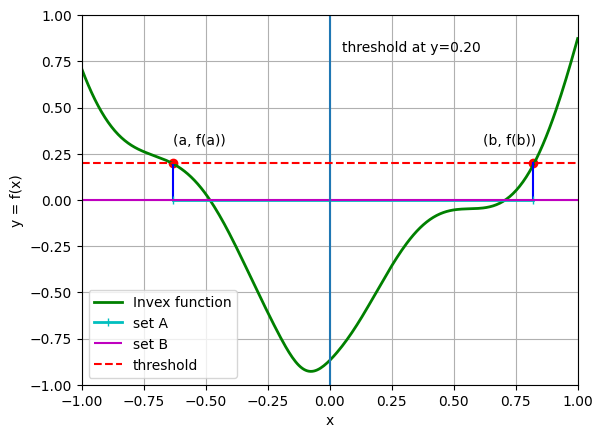

In [5]:
ycut = 0.2

_xin = x[y<=ycut]
_yin = y[y<=ycut]
_xmin, _xmax = _xin[0], _xin[-1]
_ymin, _ymax = _yin[0], _yin[-1]
_ymin, _ymax = ycut, ycut
# _xmin, _xmax, _ymin, _ymax


%matplotlib inline
# plt.scatter(x, y, marker='.', color='g')
plt.plot(x, y, color='g', lw=2, label="Invex function")
plt.plot([_xmin, _xmin], [_ymin, 0], color='b')
plt.plot([_xmax, _xmax], [_ymax, 0], color='b')
plt.plot([_xmax, _xmin], [0, 0], color='c', marker="|", lw=2, label="set A")
# plt.plot([_xmin, _xmax], [_ymin, _ymax], marker='o', color='r', linestyle='dashed')
plt.scatter([_xmin, _xmax], [_ymin, _ymax], marker='o', color='r')
plt.text(_xmin, _ymin+0.1, f"(a, f(a))")
plt.text(_xmax-0.2, _ymax+0.1, f"(b, f(b))")
plt.text(0.05, 0.8, f"threshold at y={ycut:.2f}")

plt.hlines(0, -1, 1, color='m', label="set B")
plt.vlines(0, -1, 1)
plt.hlines(ycut, -1, 1, lw=1.5, linestyle="dashed", color='r', label="threshold")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.grid()
plt.legend()
# plt.show()


In [6]:
'''
We get different decision boundary depending upon the threshold value.
Show that in multiple diagrams.
Done for 1D
'''

'\nWe get different decision boundary depending upon the threshold value.\nShow that in multiple diagrams.\nDone for 1D\n'

## 1D proof

In [7]:
def grad_myfunc(xx, func=invex_func_1d):
    xx = torch.autograd.Variable(xx, requires_grad=True)
    yy = func(xx)
    dydx = torch.autograd.grad(outputs=yy, inputs=xx,
                               grad_outputs=torch.ones_like(yy),
                               only_inputs=True, retain_graph=True, create_graph=True)[0]
    return dydx.data

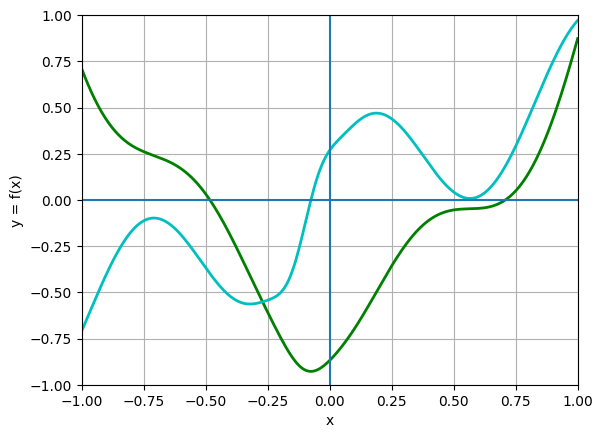

In [8]:
x = torch.tensor(np.linspace(-1, 1, 300))
with torch.no_grad():
    y = invex_func_1d(x)
dx = grad_myfunc(x, invex_func_1d)*0.2

%matplotlib inline
# plt.scatter(x, y, marker='.', color='g')
plt.plot(x, y, color='g', lw=2)
plt.plot(x, dx, color='c', lw=2)

plt.hlines(0, -1, 1)
plt.vlines(0, -1, 1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.grid()
plt.show()

In [9]:
# mu_var_w_b = torch.tensor([0.50, 0.2, 0.3, -2])
# mu_var_w_b = [0.50, 4, 0.3, 0]
mu_var_w_b = torch.tensor([0.50, 10, -0.3, 0])


def gaussian_scaled_linear_(xx, p):
    yy = torch.exp(-(p[1]*(xx-p[0]))**2)
#     yy *= (xx*p[2]+p[3])
    zz = yy* p[2]
    return zz

def gaussian_scaled_linear0(xx):
    global mu_var_w_b
    p = mu_var_w_b
    return gaussian_scaled_linear_(xx, p)
    
def modified_invex_func(xx):
    yy = invex_func_1d(xx)
    yy += gaussian_scaled_linear0(xx)
    return yy

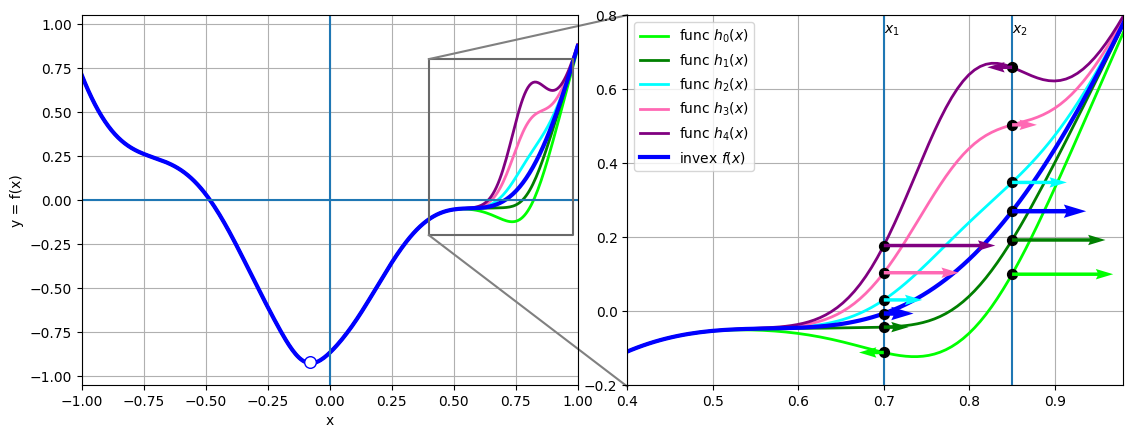

In [10]:
x = torch.tensor(np.linspace(-1, 1, 300))
with torch.no_grad():
    y = invex_func_1d(x)
    
der_scaler = 0.2
dx = grad_myfunc(x, invex_func_1d)*der_scaler

mu_var_w_b = torch.tensor([0.50, 4, -0.2, 0])
with torch.no_grad():
    y_gsl = gaussian_scaled_linear0(x)
    y_mod = modified_invex_func(x)
dx_mod = grad_myfunc(x, modified_invex_func) * der_scaler


s = 1
# mu_var_w_b0 = torch.tensor([0.80, 10*s, -0.25, 0])
# mu_var_w_b1 = torch.tensor([0.80, 10*s, -0.1, 0])
# mu_var_w_b2 = torch.tensor([0.80, 10*s, 0.1, 0])
# mu_var_w_b3 = torch.tensor([0.80, 10*s, 0.3, 0])
# mu_var_w_b4 = torch.tensor([0.80, 10*s, 0.5, 0])
# plist = [mu_var_w_b0, mu_var_w_b1, mu_var_w_b2, mu_var_w_b3, mu_var_w_b4]

plist = [
    [0.80, 8*s, -0.2, 0],
    [0.80, 10*s, -0.1, 0],
    [0.80, 10*s, 0.1, 0],
    [0.80, 10*s, 0.3, 0],
    [0.80, 10*s, 0.5, 0]]


y_mods = []
dx_mods = []
for p in plist:
    mu_var_w_b = p
    with torch.no_grad():
        y_mods.append(modified_invex_func(x))
    dx_mods.append(grad_myfunc(x, modified_invex_func) * der_scaler)
    
# colg = ["yellowgreen", "chartreuse", "limegreen", "lime", "springgreen", "seagreen", "darkgreen"]
colg = ["lime", "green", "cyan", "hotpink", "purple"]


%matplotlib inline
# plt.scatter(x, y, marker='.', color='g', label=r"invex $f(x)$")
# plt.plot(x, dx, color='c', lw=2, linestyle='dashed', label=r"grad $f(x)$")
# plt.plot(x, y_gsl, color='orange', lw=2, linestyle='dotted', label=r"func $g(x)$")
# plt.plot(x, y_mod, color=colg[0], lw=2, label=r"func $h(x)$")

for i in range(len(y_mods)):
    plt.plot(x, y_mods[i], color=colg[i], lw=2, label=r"func $h_{}(x)$".format(i))
#     plt.plot(x, torch.sign(dx_mods[i]), color=colg[i], lw=2, linestyle='dashed', label=r"sign $h(x)$")


# plt.plot(x, dx_mod, color='b', lw=2, linestyle='dashed', label=r"grad $h(x)$")
# plt.plot(x, torch.sign(dx_mod), color='grey', lw=2, linestyle='solid', label=r"sign $h(x)$")
# plt.plot(x, torch.sign(dx), color='k', lw=2, linestyle='solid', label=r"sign $h(x)$")

plt.plot(x, y, color='b', lw=3, label=r"invex $f(x)$")

plt.hlines(0, -10, 10)
plt.vlines(0, -10, 10)

plt.xlim(-1, 1)
# plt.xlim(0.4, 1)
plt.ylim(-1.05, 1.05)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.grid()
# plt.legend()

xlim = (0.4,0.98)
ylim = (-0.2, 0.8)

plt.plot([xlim[0], xlim[0], xlim[1], xlim[1], xlim[0]], [ylim[0], ylim[1], ylim[1], ylim[0], ylim[0]], color='dimgray')
plt.plot([xlim[0], 1.2], [ylim[0], -1.06], clip_on=False, color='gray')
plt.plot([xlim[0], 1.2], [ylim[1], 1.05], clip_on=False, color='gray')
plt.scatter(-0.08, -0.92, marker='o', color='w', s=70, zorder=15, edgecolor='b')

ax = plt.gca()
axins = ax.inset_axes([1.1, 0, 1, 1])
# axins.plot(x, dx)
for i in range(len(y_mods)):
    axins.plot(x, y_mods[i], color=colg[i], lw=2, label=r"func $h_{}(x)$".format(i))
#     axins.plot(x, torch.sign(dx_mods[i]), color=colg[i], lw=2, linestyle='dashed', label=r"sign $h(x)$")

xpt = torch.tensor([0.7, 0.85])
axins.vlines(xpt, -10, 10)

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0, linewidth=2)
for i in range(len(y_mods)):
    mu_var_w_b = plist[i]
    with torch.no_grad():
        ypt = modified_invex_func(xpt)
    axins.scatter(xpt, ypt, marker='o', color='k', s=50, zorder=14)

    dxpt = grad_myfunc(xpt, modified_invex_func)
    
    Q = axins.quiver(xpt, ypt, torch.sign(dxpt)*torch.maximum(torch.abs(dxpt), torch.tensor([1.0])), torch.zeros_like(ypt),
                     units='width', color=colg[i], edgecolor='k',
                     width=0.007,
                     scale=20, zorder=14)
    
#     Q1 = axins.quiver(xpt, ypt, torch.sign(dxpt)*3, torch.zeros_like(dxpt),
#                       units='width', color=colg[i],
#                       edgecolor='k',
#                       width=0.007,
#                       scale=20, zorder=15)
#     qk = axins.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
#                        coordinates='figure')
    
#     for j in range(len(dxpt)):
#         axins.annotate("", xytext=(xpt[j], ypt[j]), xy=(xpt[j]+dxpt[j]*0.03, ypt[j]), 
#                        arrowprops=prop)
        
#         axins.arrow(xpt[j], ypt[j], 0.05, dxpt[j]*0.05, zorder= 15,
#                     head_width=0.050, head_length=0.030, linewidth=1)
#     arr0 = ax2.arrow(x, y, dx,dy, head_width=0.30, head_length=0.30, linewidth=1.5, color='red', zorder=11)
#     arr1 = ax2.arrow(x, y, dx_,dy_, head_width=0.15, head_length=0.15, linewidth=1, color='m', zorder=10)

with torch.no_grad():
    ypt = invex_func_1d(xpt)
axins.scatter(xpt, ypt, marker='o', color='k', s=50, zorder=14)

dxpt = grad_myfunc(xpt, invex_func_1d)
Q = axins.quiver(xpt, ypt, torch.sign(dxpt)*torch.maximum(torch.abs(dxpt), torch.tensor([1.2])), torch.zeros_like(ypt),
                 units='width', color='b',
                 width=0.009,
                 scale=20, zorder=14)


axins.annotate(r"$x_1$", xy=(xpt[0], 0.75))
axins.annotate(r"$x_2$", xy=(xpt[1], 0.75))
axins.plot(x, y, color='b', lw=3, label=r"invex $f(x)$")
axins.legend()

# axins.indicate_inset_zoom(axins)
axins.set_xlim(*xlim)
axins.set_ylim(*ylim)
axins.grid()

# plt.show()
plt.savefig("./invex_out/visual_proof/invex_visual_proof_1D.pdf", bbox_inches='tight')

## Simple 2D func1

In [11]:
# %matplotlib inline

# x1min, x1max, nx1 = -4.5, 5.5, 75
# x2min, x2max, nx2 = -3, 7, 75
# x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
# X1, X2 = np.meshgrid(x1, x2)

# # Our function to fit is going to be a sum of two-dimensional Gaussians
# def gaussian(x1, x2, x10, x20, x1alpha, x2alpha, A):
#     return A * np.exp( -((x1-x10)/x1alpha)**2 -((x2-x20)/x2alpha)**2)

# # A list of the Gaussian parameters: x10, x20, x1alpha, x2alpha, A
# gprms = np.array([[0, 2, 2.5, 5.4, 1.5],
#          [-1, 4, 6, 2.5, 1.8],
#          [-3, -0.5, 1, 2, 4],
#          [3, 0.5, 2, 1, 5]
#         ])

# gprms[:, 4] = [0.5,0.5,0.2,0.47]

# # Standard deviation of normally-distributed noise to add in generating
# # our test function to fit.
# # The function to be fit is Z.
# Y = np.zeros(X1.shape)
# for p in gprms:
#     Y += gaussian(X1, X2, *p)
# Y = -Y
# ### Adding noise to the data
# # noise_sigma = 0.1
# # Z += noise_sigma * np.random.randn(*Z.shape)

# ####Scaling the data to range -1,1
# # X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
# # X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
# # Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

# fig = plt.figure(figsize=(15,6))
# ax = fig.add_subplot(121,projection='3d')
# ax2 = fig.add_subplot(122)
# # ax.view_init(-10, 125)
# ax.view_init(0, -110)

# # ax.clear()
# ax.plot_surface(X1, X2, Y, cmap="viridis", alpha=0.8)
# ax.plot_wireframe(X1, X2, Y, alpha=0.5, lw=0.5, color='k')
# # ax.contour3D(X1, X2, Y, alpha=0.9, levels=12, linestyles="None", colors="k")

# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# # ax2.clear()
# ax2.contourf(X1, X2, Y, levels=60)
# ax2.contour(X1, X2, Y, levels=60, colors='k', linestyles='dotted')

# plt.show()

In [12]:
x1min, x1max, nx1 = -4.5, 5.5, 75
x2min, x2max, nx2 = -3, 7, 75
x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
X1, X2 = np.meshgrid(x1, x2)

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)
xx = torch.Tensor(np.c_[x1, x2])

In [13]:
# Our function to fit is going to be a sum of two-dimensional Gaussians
def gaussian(x1, x2, x10, x20, x1alpha, x2alpha, A):
    return A * torch.exp( -((x1-x10)/x1alpha)**2 -((x2-x20)/x2alpha)**2)

In [14]:
# torch.manual_seed(10)
lin = nn.Linear(2,1)
lin.weight.data[0,0] = -1.1
lin.weight.data[0,1] = 0.2

sig = nn.Sigmoid()
def mysig(x):
    params = [4.5, 5, 2, 2, -0.05]
    p = mygaussian_(x, *params)
    return sig(lin(x)) + p

def mygaussian_(x, mean0, mean1, alpha0, alpha1, weight):
    return weight * torch.exp(-((x[:,:1]-mean0)/alpha0)**2 -((x[:,1:]-mean1)/alpha1)**2)

def mygaussian(x):
    global g1params
    return mygaussian_(x, *g1params)

def myfunc(x):
    yy = 0
    yy += mysig(x)
    yy += mygaussian(x)
    return yy

def grad_myfunc(x, func=myfunc):
#     x.requires_grad = True
    x = torch.autograd.Variable(x, requires_grad=True)
    yy = func(x)
    dydx = torch.autograd.grad(outputs=yy, inputs=x,
                               grad_outputs=torch.ones_like(yy),
                               only_inputs=True, retain_graph=True, create_graph=True)[0]
    return dydx.data

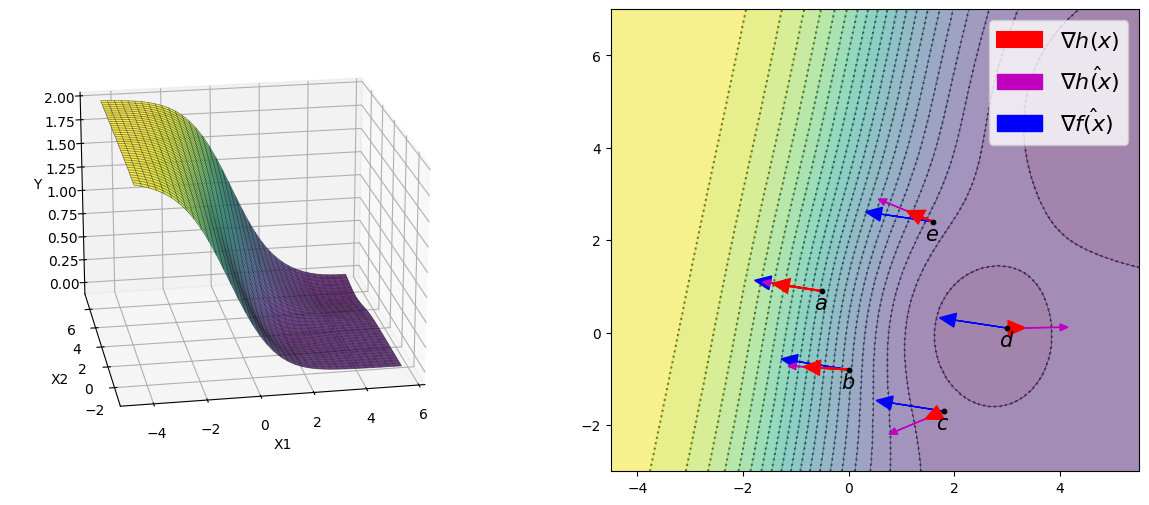

In [89]:
# %matplotlib tk
%matplotlib inline

yy = 0
# g1params = [1, 0.5, 1.8, 2.5, 0.63] #0.3, 0.53, 0.63 (change the final value/weight to check if function is invex or not)
g1params = [1, 0.5, 1.8, 2.5, -0.1] ## this creates new minima

xx.requires_grad = True
with torch.no_grad():
    yy = myfunc(xx)
        
Y = yy.numpy().reshape(X1.shape)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# ax.view_init(-10, 125)
# ax.view_init(30, -100)
# ax.view_init(10, -100)
ax.view_init(20, -100)
# ax.view_init(30, -80)


# ax.clear()
ax.plot_surface(X1, X2, Y*2, cmap="viridis", alpha=0.8)
ax.plot_wireframe(X1, X2, Y*2, alpha=0.5, lw=0.5, color='k')
# ax.contour3D(X1, X2, Y, alpha=0.9, levels=12, linestyles="None", colors="k")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# ax2.clear()
lvl=20
# lvl=30
ax2.contourf(X1, X2, Y, levels=lvl, alpha=0.5)
ax2.contour(X1, X2, Y, levels=lvl, colors='k', linestyles='dotted', alpha=0.5)


xpt = torch.tensor([
#                     [-0.65,1],
                    [-0.5,0.9],
                    [0, -0.8],
                    [1.8, -1.7],
                    [3.,0.1],
                    [1.6, 2.4],
                   ])
xpt_name = [r'$a$', r'$b$', r'$c$', r'$d$', r'$e$']

ax2.scatter(xpt[:,0], xpt[:,1], color='k', s=10, zorder=15)


xgrad = grad_myfunc(xpt, myfunc) *2.
xgrad_sig = grad_myfunc(xpt, mysig)
# print(xgrad)
for i in range(len(xpt)):
    x,y = xpt[i,0], xpt[i,1]
    dx,dy = xgrad[i,0], xgrad[i,1]
    xgrad_ = xgrad[i]/torch.norm(xgrad[i])
    dx_, dy_ = xgrad_[0], xgrad_[1]
    arr0 = ax2.arrow(x, y, dx,dy, head_width=0.30, head_length=0.30, linewidth=1.5, color='red', zorder=11)
    arr1 = ax2.arrow(x, y, dx_,dy_, head_width=0.15, head_length=0.15, linewidth=1, color='m', zorder=10)
    
    xgrad_ = xgrad_sig[i]/torch.norm(xgrad_sig[i])
    dx_, dy_ = xgrad_[0], xgrad_[1]
    arr2 = ax2.arrow(x, y, dx_,dy_, head_width=0.30, head_length=0.30, linewidth=1, color='blue', zorder=9)
    
    ax2.text(x-0.15, y-0.4, xpt_name[i], color='k', fontdict={'size':15, 'weight':"bold"}, zorder=12)

    
ax2.legend([arr0, arr1, arr2], [r'$\nabla h(x)$', r'$\hat{\nabla h(x)}$', r'$\hat{\nabla f(x)}$'],
          prop={'size': 16})

# plt.pause(10)
# plt.show()
# plt.savefig(f"./invex_out/visual_proof/invex_visual_proof_2D_{?index?}.pdf", bbox_inches='tight')

In [84]:
## The orignal function

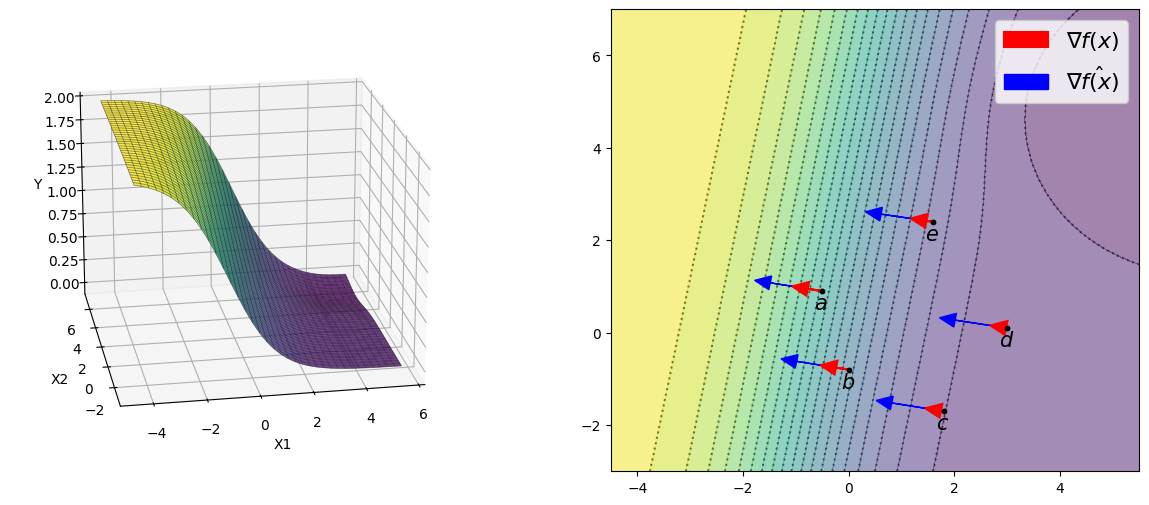

In [88]:
# %matplotlib tk
%matplotlib inline

yy = 0
xx.requires_grad = True

with torch.no_grad():
    yy = mysig(xx)
        
Y = yy.numpy().reshape(X1.shape)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)
ax.view_init(20, -100)


ax.plot_surface(X1, X2, Y*2, cmap="viridis", alpha=0.8)
ax.plot_wireframe(X1, X2, Y*2, alpha=0.5, lw=0.5, color='k')
# ax.contour3D(X1, X2, Y, alpha=0.9, levels=12, linestyles="None", colors="k")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# ax2.clear()
lvl=20
ax2.contourf(X1, X2, Y, levels=lvl, alpha=0.5)
ax2.contour(X1, X2, Y, levels=lvl, colors='k', linestyles='dotted', alpha=0.5)

xpt = torch.tensor([
#                     [-0.65,1],
                    [-0.5,0.9],
                    [0, -0.8],
                    [1.8, -1.7],
                    [3.,0.1],
                    [1.6, 2.4],
                   ])
xpt_name = [r'$a$', r'$b$', r'$c$', r'$d$', r'$e$']

ax2.scatter(xpt[:,0], xpt[:,1], color='k', s=10, zorder=15)


xgrad = grad_myfunc(xpt, mysig)
for i in range(len(xpt)):
    x,y = xpt[i,0], xpt[i,1]
    dx,dy = xgrad[i,0], xgrad[i,1]
    xgrad_ = xgrad[i]/torch.norm(xgrad[i])
    dx_, dy_ = xgrad_[0], xgrad_[1]
    arr0 = ax2.arrow(x, y, dx,dy, head_width=0.30, head_length=0.30, linewidth=1.5, color='red', zorder=11)
    arr1 = ax2.arrow(x, y, dx_,dy_, head_width=0.30, head_length=0.30, linewidth=1, color='blue', zorder=9)
    
    ax2.text(x-0.15, y-0.4, xpt_name[i], color='k', fontdict={'size':15, 'weight':"bold"}, zorder=12)

    
ax2.legend([arr0, arr1], [r'$\nabla f(x)$', r'$\hat{\nabla f(x)}$'],
          prop={'size': 16})

# plt.pause(10)
# plt.show()
# plt.savefig("./invex_out/visual_proof/invex_visual_proof_2D_0.pdf", bbox_inches='tight')

## Vector Field

In [87]:
%matplotlib tk

yy = 0
# g1params = [1, 0.5, 1.1, 2.5, 0.3]
g1params = [1, 0.5, 1.8, 2.5, 0.5]
# g1params = [1, 0.5, 1.8, 2.5, -0.1]

xx.requires_grad = True

with torch.no_grad():
    yy = myfunc(xx)
        
Y = yy.numpy().reshape(X1.shape)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)
# ax.view_init(-10, 125)
# ax.view_init(30, -100)
ax.view_init(10, -100)
# ax.view_init(30, -80)



# ax.clear()
ax.plot_surface(X1, X2, Y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(X1, X2, Y, alpha=0.5, lw=0.5, color='k')
# ax.contour3D(X1, X2, Y, alpha=0.9, levels=12, linestyles="None", colors="k")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')



# ax2.clear()
lvl=20
# ax2.contourf(X1, X2, Y, levels=lvl, alpha=0.5)
ax2.contour(X1, X2, Y, levels=lvl, colors='k', linestyles='dotted')


x1_, x2_ = np.linspace(x1min+0.1, x1max-0.1, 20), np.linspace(x2min+0.1, x2max-0.1, 20)
X1_, X2_ = np.meshgrid(x1_, x2_)
xpt = torch.Tensor(np.c_[X1_.reshape(-1), X2_.reshape(-1)])

xgrad = grad_myfunc(xpt, myfunc).data.numpy().reshape(xpt.shape[0], xpt.shape[1])
# xgrad_sig = grad_myfunc(xpt, mysig)


Q = ax2.quiver(X1_, X2_, xgrad[:,0], xgrad[:,1], units='width')
qk = ax2.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

# M = np.hypot(xgrad[:,0], xgrad[:,1])
# Q = ax2.quiver(X1_, X2_, xgrad[:,0], xgrad[:,1], M, units='x', pivot='tip', width=0.022,
#                scale=1 / 0.9955)
# qk = ax2.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')
ax2.scatter(X1_, X2_, color='k', s=5)

plt.pause(10)
plt.show()